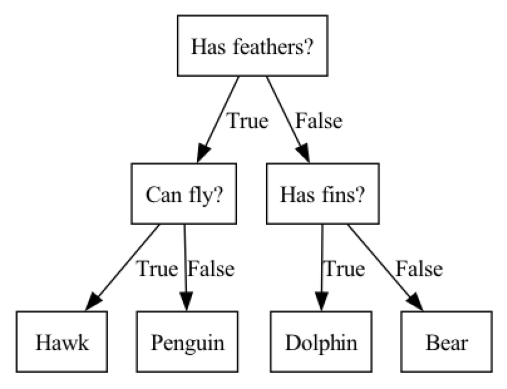

In [3]:
%matplotlib inline

import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_animal_tree()

In [8]:
# Les feuilles de l'arbre de décision étant pures, 
# la précision sur le jeu de test est nécessairement 100%
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data,
                                                    cancer_dataset.target,
                                                    stratify=cancer_dataset.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Précision sur l'ensemble d'entrainement : {:.3f}".format(tree.score(X_train,y_train)))
print("Précision sur l'ensemble de test : {:.3f}".format(tree.score(X_test,y_test)))

Précision sur l'ensemble d'entrainement : 1.000
Précision sur l'ensemble de test : 0.937


In [10]:
# Pour limiter le sur-apprentissage on définit une profondeur maximale à l'abre de décision
max_depth = 4
tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
tree.fit(X_train,y_train)
print("Précision sur l'ensemble d'entrainement : {:.3f}".format(tree.score(X_train,y_train)))
print("Précision sur l'ensemble de test : {:.3f}".format(tree.score(X_test,y_test)))

Précision sur l'ensemble d'entrainement : 0.988
Précision sur l'ensemble de test : 0.951


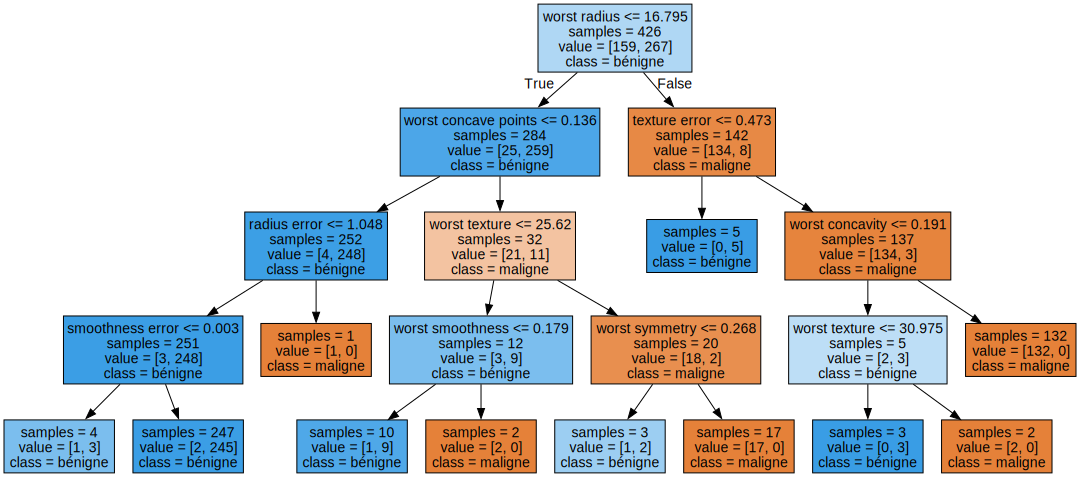

In [12]:
# Visualisation de l'arbre via graphviz

# Export de l'arbre vers un fichier
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["maligne","bénigne"],
               feature_names=cancer_dataset.feature_names,
               impurity=False, filled=True)

# affichage du fichier .dot
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [14]:
# Importance des paramètres 
print("Importance des paramètres: \n{}".format(tree.feature_importances_))

Importance des paramètres: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


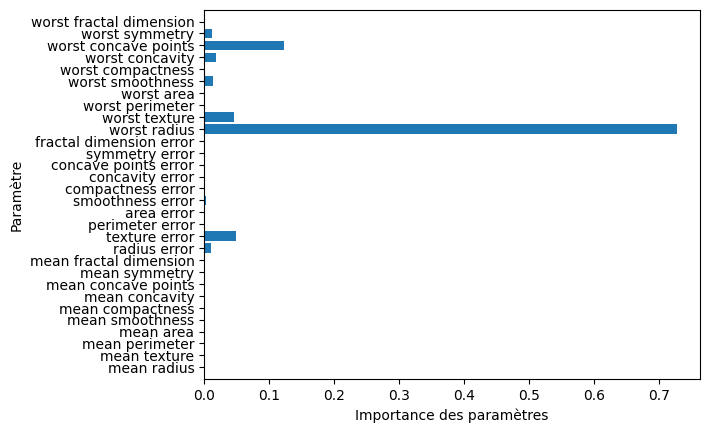

In [16]:
# Graphiquement
import numpy as np
def plot_feature_importances(model):
    n_features = cancer_dataset.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer_dataset.feature_names)
    plt.xlabel("Importance des paramètres")
    plt.ylabel("Paramètre")
    plt.ylim(-1,n_features)
    
plot_feature_importances(tree)